In [1]:
!pip install --user timit-utils==0.9.0

  Using cached timit_utils-0.9.0-py3-none-any.whl (11 kB)
Processing /zfs/store5.hydra.local/user/r/rybakina/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb/python_speech_features-0.6-py3-none-any.whl


In [2]:
!pip install --user torchaudio

     |████████████████████████████████| 1.9 MB 1.9 MB/s eta 0:00:01     |█████████████████████████▌      | 1.5 MB 1.9 MB/s eta 0:00:01
     |███████████████████████████▉    | 639.0 MB 59.5 MB/s eta 0:00:024 |▏                               | 3.8 MB 8.1 MB/s eta 0:01:31     |▏                               | 5.0 MB 8.1 MB/s eta 0:01:31     |▍                               | 8.7 MB 8.1 MB/s eta 0:01:30     |█████████████████▋              | 405.4 MB 39.4 MB/s eta 0:00:09     |████████████████████████▉       | 571.8 MB 63.5 MB/s eta 0:00:03     |███████████████████████████▍    | 630.7 MB 59.5 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████████▍ | 697.4 MB 59.5 MB/s eta 0:00:01

     |██████████████████████████████▌ | 701.3 MB 65.1 MB/s eta 0:00:01

     |██████████████████████████████▊ | 705.8 MB 65.1 MB/s eta 0:00:01

     |███████████████████████████████ | 710.0 MB 65.1 MB/s eta 0:00:01

     |███████████████████████████████ | 714.0 MB 65.1 MB/s eta 0:00:01

     |███████████████████████████████▎| 718.1 MB 65.1 MB/s eta 0:00:01

     |███████████████████████████████▍| 722.7 MB 65.1 MB/s eta 0:00:01

     |███████████████████████████████▋| 726.7 MB 65.1 MB/s eta 0:00:01

     |████████████████████████████████| 735.4 MB 65.1 MB/s eta 0:00:01

     |████████████████████████████████| 735.5 MB 35 kB/s s eta 0:00:01
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!wget --no-check-certificate https://datashare.ed.ac.uk/download/DS_10283_1942.zip

--2021-02-26 03:18:28--  https://datashare.ed.ac.uk/download/DS_10283_1942.zip
Resolving datashare.ed.ac.uk (datashare.ed.ac.uk)... 192.41.117.26
Connecting to datashare.ed.ac.uk (datashare.ed.ac.uk)|192.41.117.26|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 200
Length: 2150533410 (2.0G) [application/zip]
Saving to: ‘DS_10283_1942.zip’

100%[====================================>] 2,150,533,410  701KB/s   in 48m 34s

2021-02-26 04:07:03 (721 KB/s) - ‘DS_10283_1942.zip’ saved [2150533410/2150533410]



In [8]:
!wget https://ndownloader.figshare.com/files/10256148 

--2021-02-26 04:07:03--  https://ndownloader.figshare.com/files/10256148
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.76.40.177, 52.18.234.192, 34.251.142.61, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.76.40.177|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/10256148/TIMIT.zip [following]
--2021-02-26 04:07:03--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/10256148/TIMIT.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.53.170
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.53.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 440207227 (420M) [binary/octet-stream]
Saving to: ‘10256148’

100%[======================================>] 440,207,227 28.4MB/s   in 19s    

2021-02-26 04:07:23 (22.1 MB/s) - ‘10256148’ saved [440207227/440207227]



In [11]:
!unzip DS_10283_1942.zip

Archive:  DS_10283_1942.zip
replace clean_trainset_wav.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [31]:
DATA_PATH = 'data/lisa/data/timit/raw/TIMIT'
import timit_utils as tu
corpus = tu.Corpus(DATA_PATH)
sentence = corpus.train.sentences_by_phone_df('aa').sentence[0]

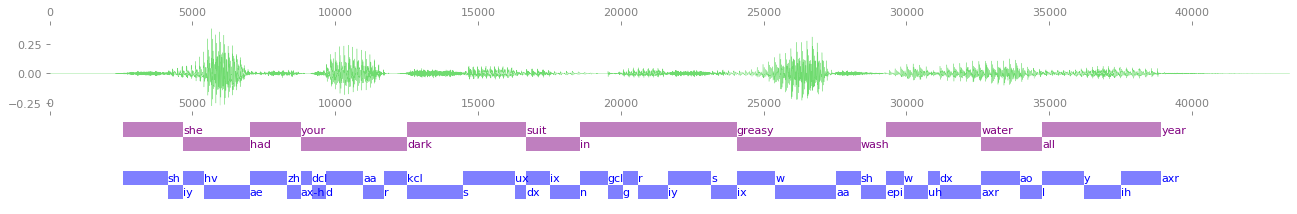

In [32]:
import timit_utils as tu
import os
import librosa
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
import timit_utils as tu
import timit_utils.audio_utils as au
import timit_utils.drawing_utils as du

du.DrawVerticalPanels([du.AudioPanel(sentence.raw_audio, show_x_axis=True),
                       du.WordsPanel(sentence.words_df, sentence.raw_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(sentence.phones_df, sentence.raw_audio.shape[0])
                      ])
class timit_dataloader:
    def __init__(self, data_path=DATA_PATH, train_mode=True, age_mode=False):
        self.doc_file_path = os.path.join(data_path, 'DOC', 'SPKRINFO.TXT')
        self.corpus = tu.Corpus(data_path)
        with open(self.doc_file_path) as f:
            self.id_sex_dict = dict([(tmp.split(' ')[0], tmp.split(' ')[2]) for tmp in f.readlines()[39:]])
        if train_mode:
            self.trainset = self.create_dataset('train')
            self.validset = self.create_dataset('valid')
        self.testset = self.create_dataset('test')

    def return_sex(self, id):
        return self.id_sex_dict[id]

    def return_data(self):
        return self.trainset, self.validset, self.testset

    def create_dataset(self, mode):
        global people
        assert mode in ['train', 'valid', 'test']
        if mode == 'train':
            people = [self.corpus.train.person_by_index(i) for i in range(350)]
        if mode == 'valid':
            people = [self.corpus.train.person_by_index(i) for i in range(350, 400)]
        if mode == 'test':
            people = [self.corpus.test.person_by_index(i) for i in range(150)]
        spectrograms_and_targets = []

        for person in tqdm(people):
            target = self.return_sex(person.name)
            for i in range(len(person.sentences)):
                spectrograms_and_targets.append(
                    self.preprocess_sample(person.sentence_by_index(i).raw_audio, 
                                           target))

        X, y = map(np.stack, zip(*spectrograms_and_targets))
        X = X.transpose([0, 2, 1])  # to [batch, time, channels]
        return X, y
    @staticmethod
    def spec_to_image(spec, eps=1e-6):
        mean = spec.mean()
        std = spec.std()
        spec_norm = (spec - mean) / (std + eps)
        spec_min, spec_max = spec_norm.min(), spec_norm.max()
        spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
        spec_scaled = spec_scaled.astype(np.uint8)
        return spec_scaled

    def preprocess_sample(self, amplitudes, target=None, age_mode=False, 
                          sr=16000, max_length=150):
      # spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=sr, f_min=1, n_mels=128, f_max=8192)(amplitudes)[:,:max_length]
        spectrogram = librosa.feature.melspectrogram(amplitudes, sr=sr, n_mels=128, fmin=1, fmax=8192)[:, :max_length]
        spectrogram = np.pad(spectrogram, [[0, 0], [0, max(0, max_length - spectrogram.shape[1])]], mode='constant')
        if target == None:
          return np.array([self.spec_to_image(np.float32(spectrogram))]).transpose([0, 2, 1])
        target = 0 if target == 'F' else 1
        return self.spec_to_image(np.float32(spectrogram)), target


In [46]:
class dataloader:
    def __init__(self, spectrograms, targets):
        self.data = np.array(list(zip(spectrograms, targets)))#на вход модели спектограммы, на выход результат
    
    def next_batch(self, batch_size, device):
        indices=np.random.permutation(len(self.data))
        print(indices)
        self.data=self.data[indices]
        
        for i in range(len(self.data)//batch_size):
            input = self.data[batch_size*i:batch_size*(i+1)]
            source = [line[0] for line in input]
            target = [line[1] for line in input]
            print(len(source))
            print(len(target))
            yield self.torch_batch(source, target, device)

    @staticmethod
    def torch_batch(source, target, device):
        return tuple(
            [
                t.tensor(val, dtype=t.float).to(device, non_blocking=True)
                for val in [source, target]
            ]
        )

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using {device} mode')
patience = 500
best_loss = 1000
cnt = 0




_timit_dataloader = timit_dataloader()
train, valid, test = _timit_dataloader.return_data()

trainset = dataloader(*train)
validset = dataloader(*valid)
testset = dataloader(*test)
BATCH_SIZE = 64


  0%|          | 0/350 [00:00<?, ?it/s]

using cuda mode


100%|██████████| 150/150 [00:32<00:00,  4.55it/s]


In [95]:
class Model(nn.Module):
    def __init__(self, window_sizes=(3, 4)):
        super(Model, self).__init__()

        self.convs = nn.ModuleList([
            nn.Conv2d(1, 32, [window_size, 32], padding=(window_size - 1, 0))
            for window_size in window_sizes
        ])

        self.fc = nn.Linear(32 * len(window_sizes), 1)

    def forward(self, x):
        # Apply a convolution + max pool layer for each window size
        x = torch.unsqueeze(x, 1)  # [B, C, T, E] Add a channel dim. зачем?
        print(x.shape)
        xs = []
        for conv in self.convs:
            x2 = F.relu(conv(x))  # [B, F, T, 1]
            print(x2.shape)
            x2 = torch.squeeze(x2, -1)  # [B, F, T]
            print(x2.shape)
            x2 = F.max_pool1d(x2, x2.size(2))  # [B, F, 1]
            xs.append(x2)
        x = torch.cat(xs, 2)  # [B, F, window]

        # FC
        x = x.view(x.size(0), -1)  # [B, F * window]
        logits = self.fc(x)  # [B, class]
        probs = torch.sigmoid(logits).view(-1)
        return probs

    def loss(self, probs, targets):
        return nn.BCELoss()(probs.float(), targets.float())

In [96]:
model = Model()
if device == torch.device('cuda'):
    model.cuda()
else:
    model.cpu()
model.train()

optimizer = Adam(
    [p for p in model.parameters() if p.requires_grad], betas=(0.9, 0.999), eps=1e-5
)

In [97]:
import torch as t

for i in range(10):
    model.train()
    
    lst_out=[]
    lst_target=[]
    lst_loss=[]
    
    for batch in tqdm(trainset.next_batch(BATCH_SIZE, device=device)):
        
        optimizer.zero_grad()
        input_, target = batch
        print(input_.shape)
        out = model(input_)
        loss = model.loss(out, target)
        loss.backward()
        optimizer.step()
        lst_loss.append(loss.item())
        lst_target.extend(target.data.cpu().numpy())
        out_ = [1. if tmp > 0.5 else 0 for tmp in out]
        lst_out.extend(out_)
        
    model.eval()
    print(f'train accuracy_score:{accuracy_score(lst_out, lst_target)}')
    print("i {}, train {}".format(i, np.mean(lst_loss)))
    print("_________")
    
    with torch.no_grad():
        optimizer.zero_grad()
        lst_val_out=[]
        lst_val_target=[]
        lst_val_loss=[]
        for batch in validset.next_batch(BATCH_SIZE, device=device):
            
            input_, target = batch
            out = model(input_)
            
            valid_loss = model.loss(out, target)
            out, target = out.cpu().detach().numpy(), target.cpu().detach().numpy()
            out = [1. if tmp > 0.5 else 0 for tmp in out]
            lst_val_out.extend(out)
            lst_val_target.extend(target)
            # print(out, target)
            lst_val_loss.append(valid_loss.item())
        print(f'valid accuracy_score:{accuracy_score(lst_val_out, lst_val_target)}')
        print("i {}, valid {}".format(i, np.mean(lst_val_loss)))
        #print(len(target))
        print("_________")
    

''' 
    if i % 50 == 0 and best_loss > valid_loss.item():
        best_loss = valid_loss.item()
        cnt = 0
    else:
        cnt += 1
    
    if cnt > patience:
        break
    print('training finished')
'''

model.eval()

0it [00:00, ?it/s]

torch.Size([64, 150, 128])
torch.Size([64, 1, 150, 128])
torch.Size([64, 32, 152, 97])
torch.Size([64, 32, 152, 97])


RuntimeError: Expected 3-dimensional tensor, but got 4-dimensional tensor for argument #1 'self' (while checking arguments for max_pool1d)

In [9]:
def predict(wavfile):
    waveform, _ = librosa.load(wavfile, sr=16000)

    input = _timit_dataloader.preprocess_sample(waveform)
    with torch.no_grad():
        out = model(torch.tensor(input, dtype=torch.float).to(device))
        out = out.cpu().detach().numpy()
    #male 1
    out = 0 if out < 0.5 else 1
    return out

In [10]:
import pandas as pd
df = pd.read_csv('../beam_test.csv')
cleans = df.clean_path.value_counts().index

In [13]:
df['genre'].value_counts()

male      1344
female    1303
Name: genre, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, x) 

array([[ 710,  593],
       [   6, 1338]])

In [16]:
lst = []
x = [] #predict
y = []
import os
for i in df.itertuples(index=False):
    x.append(predict(os.path.join('../', i.clean_path)))
    if(i.genre == 'male'):
        y.append(1)
    else: y.append(0)

In [9]:
import numpy as np
count = np.sum(np.asarray(lst))/len(lst)
count

0.7737060823573857

In [49]:
str_ = '../clean_noises_1_02/01caaa85fc2e1female.wav'

In [50]:
predict(str_)

[6.861232e-17]


'female'

In [51]:
from IPython.display import Audio
Audio(str_)

In [ ]:
!rm -r DS_10283_1942.zip
!rm -r 10256148